<a href="https://colab.research.google.com/github/JuliMillan/Series-temporales/blob/main/Ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from pandas.plotting import lag_plot
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import mean_squared_error
import plotly.express as px

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Programación/DS/Nubiral/retailer_sample.csv', sep=',')

##Funciones para graficar

In [4]:
def count_plot_vertical(columna1, columna2, df,paleta=sns.color_palette(), 
                        xlabel='', ylabel='Cantidad', tamano=(6,6),
                        title='', pad=-60):
  """
  columna1: df['columna1']
  columna2: "columna"
  """
  orden=columna1.value_counts().index
  total=columna1.count()
  fig, ax = plt.subplots(figsize=tamano)
  sns.countplot(x=columna2, data=df, palette=paleta, order=orden)
  #Para mostrar los valores sobre las barras verticales
  for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = "{:.1f}%".format((int(p.get_height())*100)/total) # porcentaje
    ax.text(_x, _y, value, ha="center") 
  plt.xlabel('{}'.format(xlabel))
  plt.ylabel('{}'.format(ylabel))
  ax.set_yticklabels([])
  ax.set_title(title, fontsize=20, loc='Center', y=1,  pad=pad)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  return plt.show()


def horizontal(x, y, data, sort, xlabel='', ylabel=''):
  """
  Gráfico de barras horizontales
  """
  fig, ax = plt.subplots(figsize=(15,8))
  sns.barplot(x=x, y=y, data=data.sort_values(sort, ascending=False))
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  return plt.show()


def mas_vendidas_provincia(provincia):

  a_p = a_2.unstack()
  aa = pd.DataFrame(a_p.loc[provincia]).reset_index()
  aa = aa.drop(columns=['level_0'])
  aa.columns = ['BRAND', 'Sales ARS']
  aa = (aa.sort_values(by='Sales ARS', ascending=False)).head(10)
  fig, ax = plt.subplots(figsize=(10, 6))
  sns.barplot(x='BRAND', y='Sales ARS', data=aa, palette='magma')
  plt.xticks(rotation=90)
  plt.xlabel('Marcas')
  plt.ylabel('Ventas en ARS')
  plt.title("Marcas más vendidas en "+'{}'.format(provincia), fontdict = {'fontsize' : 24})

  return plt.show()

## Exploración de los datos

In [5]:
df.head()

,Year,Month,Segment,Subsegment,BRAND,SYSTEM,PROVINCE,RETAILER,Sales Units,Th. Sales Value USD,Th. Sales Value ARS
0,2017,January,A,01,BRAND-1,Old,BUENOS AIRES,F,912.645,483.412463,7702.772260
1,2017,February,A,01,BRAND-1,Old,BUENOS AIRES,F,786.420,413.161071,6511.058545
2,2017,March,A,01,BRAND-1,Old,BUENOS AIRES,F,508.110,277.760285,4293.800075
3,2017,April,A,01,BRAND-1,Old,BUENOS AIRES,F,589.175,323.879777,4994.754164
4,2017,May,A,01,BRAND-1,Old,BUENOS AIRES,F,441.900,234.857981,3585.849960


In [6]:
df.columns

Index(['Year', 'Month', 'Segment', 'Subsegment', 'BRAND', 'SYSTEM', 'PROVINCE',
       'RETAILER', 'Sales Units', 'Th. Sales Value USD',
       'Th. Sales Value ARS'],
      dtype='object')

In [7]:
df.columns = ['Year', 'Month', 'Segment', 'Subsegment', 'BRAND', 'SYSTEM', 'PROVINCE',
       'RETAILER', 'Sales Units', 'Sales USD',
       'Sales ARS']

In [8]:
df.shape

(256853, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256853 entries, 0 to 256852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         256853 non-null  int64  
 1   Month        256853 non-null  object 
 2   Segment      256853 non-null  object 
 3   Subsegment   256853 non-null  object 
 4   BRAND        256853 non-null  object 
 5   SYSTEM       256853 non-null  object 
 6   PROVINCE     256853 non-null  object 
 7   RETAILER     256853 non-null  object 
 8   Sales Units  256853 non-null  float64
 9   Sales USD    256853 non-null  float64
 10  Sales ARS    256853 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 21.6+ MB


In [10]:
df.describe()

,Year,Sales Units,Sales USD,Sales ARS
count,256853.000000,256853.000000,256853.000000,256853.000000
mean,2018.489817,15.734743,10.418320,406.165777
std,1.206668,54.436726,34.268073,1554.217185
min,2017.000000,-136.230000,-66.261423,-3831.257586
25%,2017.000000,1.500000,0.969474,29.948445
50%,2018.000000,3.105000,2.545359,85.588651
75%,2020.000000,10.500000,7.396908,264.584175
max,2021.000000,2927.535000,2066.790594,117362.296844


In [11]:
print(df['Year'].min(), '-', df['Year'].max())

2017 - 2021


In [12]:
df[['Year', 'Month']]

,Year,Month
0,2017,January
1,2017,February
2,2017,March
3,2017,April
4,2017,May
...,...,...
256848,2021,February
256849,2021,February
256850,2021,February
256851,2021,February


In [13]:
df[df.Year==2021].Month.unique()
#Para el 2021 tengo sóólo los dos primeros meses

array(['January', 'February'], dtype=object)

### Ventas totales

Unidades vendidas

In [14]:
unidades = pd.DataFrame(df.groupby('PROVINCE').agg({'Sales Units': 'sum'}).reset_index()).sort_values(by='Sales Units', ascending=False)
unidades.head()

,PROVINCE,Sales Units
4,CAP. FED. Y GBA,683758.878110
18,NO REG SPLIT AR,515088.751599
2,BUENOS AIRES,411185.441346
8,CORDOBA,324518.617043
24,SANTA FE,259429.868595


In [15]:
fig = px.bar(unidades, x="Sales Units", y="PROVINCE", orientation='h',color="PROVINCE", height=600)
fig.update_layout(showlegend=False)
fig.show()

In [16]:
ventas_totales = pd.DataFrame(df.groupby('PROVINCE').agg({'Sales ARS': 'sum'}).reset_index())
ventas_totales.head()

,PROVINCE,Sales ARS
0,BS.AS. GBA,8.728927e+06
1,BS.AS. INTERIOR,7.226350e+06
2,BUENOS AIRES,7.456318e+06
3,CABA ARGENTINA,4.759194e+06
4,CAP. FED. Y GBA,1.039053e+07


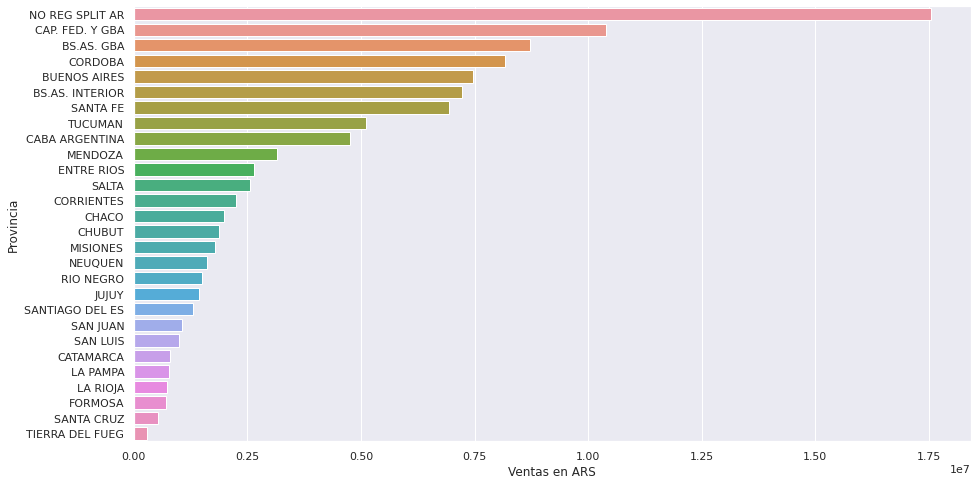

In [17]:
horizontal("Sales ARS", "PROVINCE", ventas_totales, 
           'Sales ARS', 'Ventas en ARS', 'Provincia')

In [18]:
#fig, ax = plt.subplots(figsize=(15,8))
#sns.barplot(x="Sales ARS", y="PROVINCE", 
#            data=ventas_totales.sort_values('Sales ARS', 
#                                           ascending=False))
#plt.xlabel('Ventas en ARS')
#plt.ylabel('Provincia')
#plt.show()

In [19]:
#Le saco el 'No reg split ar'
df = df[df['PROVINCE'] != 'NO REG SPLIT AR']
ventas_ars = pd.DataFrame(df.groupby('PROVINCE').agg({'Sales ARS': 'sum'}).reset_index())

In [20]:
prov = df['PROVINCE'].unique()
prov

array(['BUENOS AIRES', 'CAP. FED. Y GBA', 'CATAMARCA', 'CHACO', 'CHUBUT',
       'CORDOBA', 'ENTRE RIOS', 'LA PAMPA', 'LA RIOJA', 'MENDOZA',
       'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SAN JUAN', 'SAN LUIS',
       'SANTA CRUZ', 'SANTA FE', 'SANTIAGO DEL ES', 'CORRIENTES',
       'FORMOSA', 'JUJUY', 'SALTA', 'TUCUMAN', 'TIERRA DEL FUEG',
       'CABA ARGENTINA', 'BS.AS. GBA', 'BS.AS. INTERIOR'], dtype=object)

In [21]:
#horizontal("Sales ARS", "PROVINCE", ventas_ars, 
#           'Sales ARS', 'Ventas en ARS', 'Provincias')

In [22]:
v_a = ventas_ars.sort_values(by='Sales ARS', ascending=False)

In [23]:
fig = px.bar(v_a, x="Sales ARS", y="PROVINCE", orientation='h',color="PROVINCE", height=600)
fig.update_layout(showlegend=False)
fig.show()

In [24]:
ventas_dolares = pd.DataFrame(df.groupby('PROVINCE').agg({'Sales USD': 'sum'}).reset_index())
ventas_dolares.head()

,PROVINCE,Sales USD
0,BS.AS. GBA,123517.083340
1,BS.AS. INTERIOR,101262.860496
2,BUENOS AIRES,271545.824530
3,CABA ARGENTINA,82220.397862
4,CAP. FED. Y GBA,481598.532667


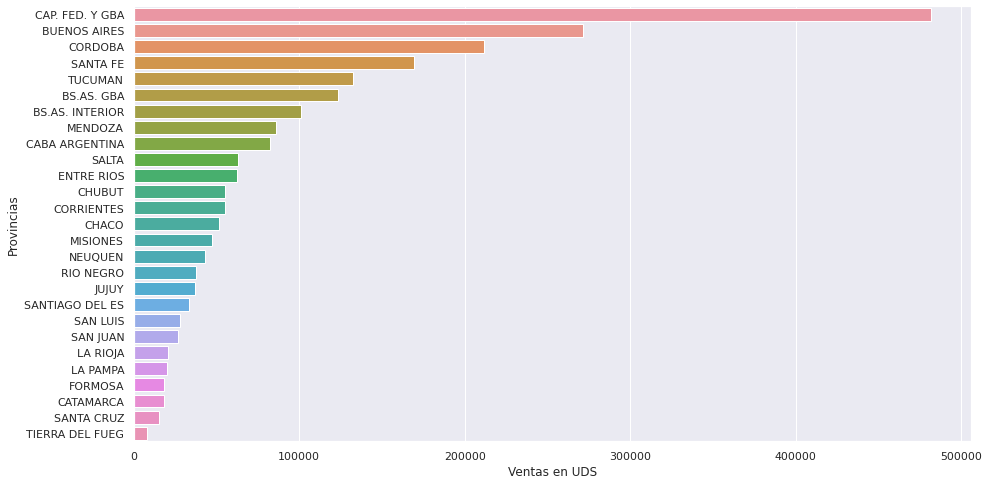

In [25]:
horizontal("Sales USD", "PROVINCE", ventas_dolares, 
           'Sales USD', 'Ventas en UDS', 'Provincias')

In [26]:
df['Segment'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)

In [27]:
df['Subsegment'].unique()

array(['01', '04', '03', '02', '05', 'OTHERS'], dtype=object)

In [28]:
df['BRAND'].unique()

array(['BRAND-1', 'BRAND-2', 'BRAND-3', 'BRAND-4', 'BRAND-5', 'BRAND-6',
       'BRAND-7', 'BRAND-8', 'BRAND-9', 'BRAND-10', 'BRAND-11',
       'BRAND-12', 'BRAND-13', 'BRAND-14', 'BRAND-15', 'BRAND-16',
       'BRAND-17', 'BRAND-18', 'BRAND-19', 'BRAND-20', 'BRAND-21',
       'BRAND-22', 'BRAND-23', 'BRAND-24', 'BRAND-25', 'BRAND-26',
       'BRAND-27', 'BRAND-28', 'BRAND-29', 'BRAND-30', 'BRAND-31',
       'BRAND-32', 'BRAND-33', 'BRAND-34', 'BRAND-35', 'BRAND-36',
       'BRAND-37', 'BRAND-38', 'BRAND-39', 'BRAND-40', 'BRAND-41',
       'BRAND-42', 'BRAND-44', 'BRAND-45', 'BRAND-46', 'BRAND-47',
       'BRAND-48', 'BRAND-49', 'BRAND-50', 'BRAND-51', 'BRAND-52',
       'BRAND-53'], dtype=object)

In [29]:
#df.head()

In [30]:
mas_vendidas = (df.groupby(['BRAND']).agg({'Sales ARS':
                                           'sum'}).reset_index()).sort_values(
                                               'Sales ARS', ascending=False).head(10)

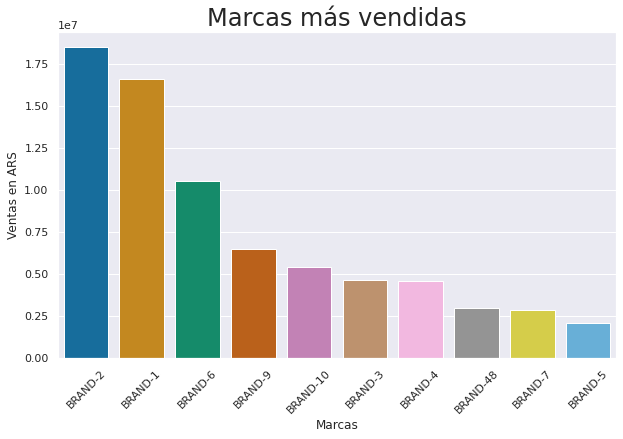

In [31]:
color = (sns.color_palette("colorblind"))
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='BRAND', y ='Sales ARS', data = mas_vendidas, palette=color)
plt.xticks(rotation=45)
plt.xlabel('Marcas')
plt.ylabel('Ventas en ARS')
plt.title('Marcas más vendidas', fontdict = {'fontsize' : 24})
plt.show()

In [32]:
m_v = (df.groupby(['BRAND']).agg({'Sales ARS':
                                           'sum'}).reset_index()).sort_values(
                                               'Sales ARS', ascending=False)
                                           
                                           
fig = px.bar(m_v, x='BRAND', y ='Sales ARS',color='BRAND')
fig.update_layout(showlegend=False)
fig.show()

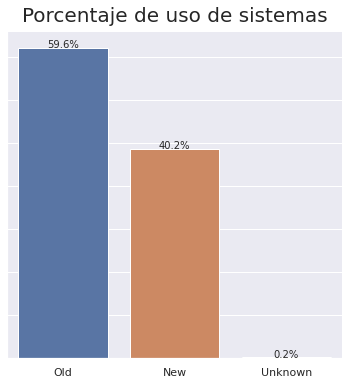

In [33]:
count_plot_vertical(df['SYSTEM'], 'SYSTEM', df, ylabel='', title='Porcentaje de uso de sistemas', pad=10)

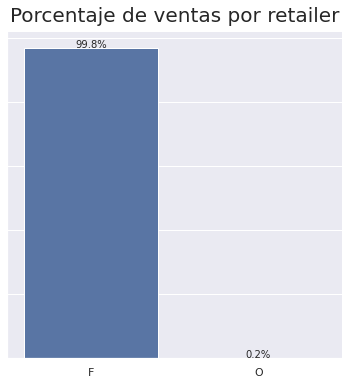

In [91]:
count_plot_vertical(df['RETAILER'], 'RETAILER', df, ylabel='', title='Porcentaje de ventas por retailer', pad=10)

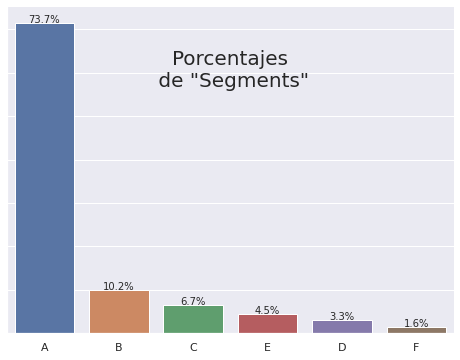

In [34]:
count_plot_vertical(df['Segment'], 'Segment', df, 
                    ylabel='', tamano=(8, 6), pad=-80,
                    title='Porcentajes\n de "Segments"')

In [35]:
fig = px.histogram(df, x="Segment", height=400, width=600, color='Segment')
fig.update_layout(showlegend=False)
fig.update_yaxes(visible=False, showticklabels=False)
fig.show()

In [36]:
#ax, fig = plt.subplots(figsize=(9,6))
#sns.countplot(x="Subsegment", data=df)
#plt.ylabel('')
#plt.show()

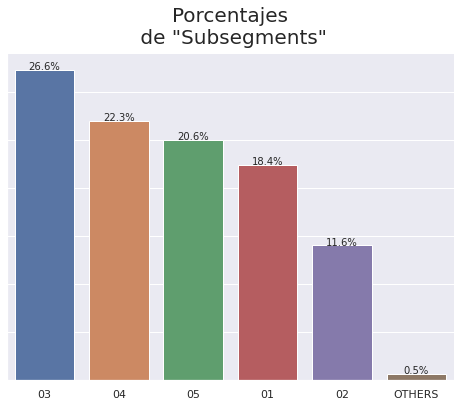

In [37]:
count_plot_vertical(df['Subsegment'], 'Subsegment', df, ylabel='', 
                    tamano=(8,6), title='Porcentajes\n de "Subsegments"',
                    pad=10)

Venta de marcas por provincias

In [38]:
a = df[['PROVINCE', 'BRAND', 'Sales ARS']]
a.head()

,PROVINCE,BRAND,Sales ARS
0,BUENOS AIRES,BRAND-1,7702.772260
1,BUENOS AIRES,BRAND-1,6511.058545
2,BUENOS AIRES,BRAND-1,4293.800075
3,BUENOS AIRES,BRAND-1,4994.754164
4,BUENOS AIRES,BRAND-1,3585.849960


In [39]:
a_2 = a.groupby(['PROVINCE', 'BRAND']).sum('Sales ARS')

In [40]:
a_2.head()

Sales ARS
PROVINCE   BRAND                 
BS.AS. GBA BRAND-1   1.962992e+06
           BRAND-10  5.402023e+05
           BRAND-11  1.060310e+05
           BRAND-12  1.795395e+05
           BRAND-14  1.972719e+05

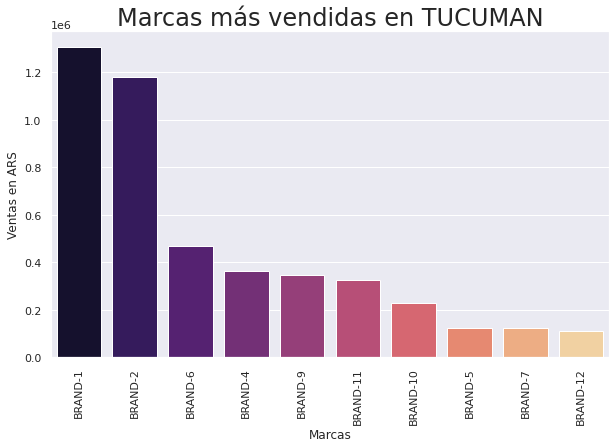

In [43]:
mas_vendidas_provincia('TUCUMAN')

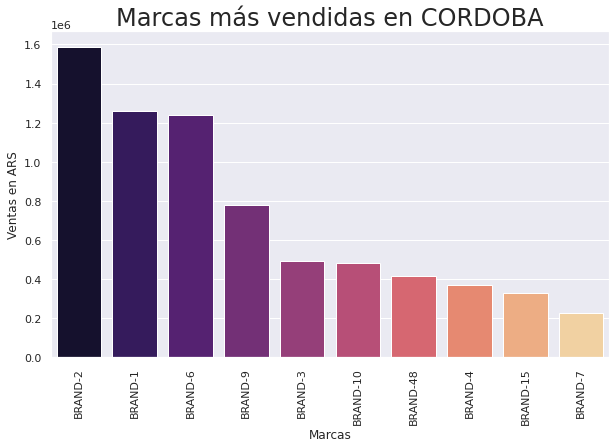

In [44]:
mas_vendidas_provincia('CORDOBA')

#### Ventas en pesos y dólares

##### Ventas en pesos

In [45]:
provincias = pd.DataFrame(df.groupby(['PROVINCE', 'Year', 'Month']).agg
                          ({'Sales ARS': 'sum', 'Sales USD': 'sum'}).reset_index())
provincias.columns = ["".join(a) for a in provincias.columns.to_flat_index()]
provincias.head()

,PROVINCE,Year,Month,Sales ARS,Sales USD
0,BS.AS. GBA,2019,December,578984.252938,9625.287938
1,BS.AS. GBA,2019,November,475567.988027,7964.463632
2,BS.AS. GBA,2019,October,598674.533508,10354.048343
3,BS.AS. GBA,2020,April,52480.381533,814.121383
4,BS.AS. GBA,2020,August,319984.835400,4407.782142


In [46]:
provincias['Fecha'] = provincias['Month']+' ' + (provincias['Year'].astype(str))
provincias['Fecha'] = pd.to_datetime(provincias['Fecha'])
provincias = provincias.drop(columns=['Year', 'Month'])
provincias = provincias[[ 'Fecha', 'PROVINCE', 'Sales ARS', 'Sales USD']]
provincias.head()

,Fecha,PROVINCE,Sales ARS,Sales USD
0,2019-12-01,BS.AS. GBA,578984.252938,9625.287938
1,2019-11-01,BS.AS. GBA,475567.988027,7964.463632
2,2019-10-01,BS.AS. GBA,598674.533508,10354.048343
3,2020-04-01,BS.AS. GBA,52480.381533,814.121383
4,2020-08-01,BS.AS. GBA,319984.835400,4407.782142


In [47]:
prov = provincias.pivot(index='PROVINCE', columns='Fecha', values='Sales ARS')
prov.columns.to_flat_index()
#prov.head()
pro = provincias.pivot(index='Fecha',columns='PROVINCE')
prov.head()

Fecha,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01
PROVINCE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BS.AS. GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,598674.533508,475567.988027,578984.252938,618429.743001,510888.426666,331291.447824,52480.381533,189792.122975,233609.434630,312111.615630,319984.835400,374760.651036,717059.439145,676052.314635,1.048753e+06,997005.450725,693481.331643
BS.AS. INTERIOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,444743.407165,363276.169242,394279.463693,436206.788327,310012.123659,202990.181599,69600.860377,186765.394126,336848.088226,367404.810401,311781.926565,357638.310749,662003.381249,451138.977309,9.989335e+05,773425.943643,559300.659791
BUENOS AIRES,194262.246916,127349.009919,105836.092528,95196.826398,102689.791651,87804.656890,127060.731219,110728.321425,113017.629591,177440.452914,169297.608654,258590.022220,266482.566022,222892.760464,215513.149398,180775.050414,194425.685961,145597.728586,139221.911377,133175.439181,140931.970055,204953.337062,150422.144602,252691.014972,484080.481992,289980.832558,293685.19178,241738.934455,421996.590067,292321.192446,435715.843456,432438.130595,648004.564178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CABA ARGENTINA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422657.154832,353419.848610,431277.330745,404358.545160,163104.725053,227331.475245,189298.840935,212903.782907,231496.078425,180304.928670,121183.335420,24684.768630,76552.439824,80528.342865,79165.934010,114062.423865,145181.529990,277395.928215,212552.606430,2.571073e+05,320798.815729,233827.987980
CAP. FED. Y GBA,535653.728993,335520.806276,283083.091251,250016.378579,310340.561096,256750.985114,365169.838583,307840.268235,342107.826271,473703.965068,343348.842966,514911.130654,546680.357154,409687.898885,383368.515401,334545.236506,421472.206269,265219.792151,371120.982696,320103.078525,307574.328652,463992.305163,299839.780852,440942.945201,499990.533151,362335.862292,350829.35811,294379.110135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


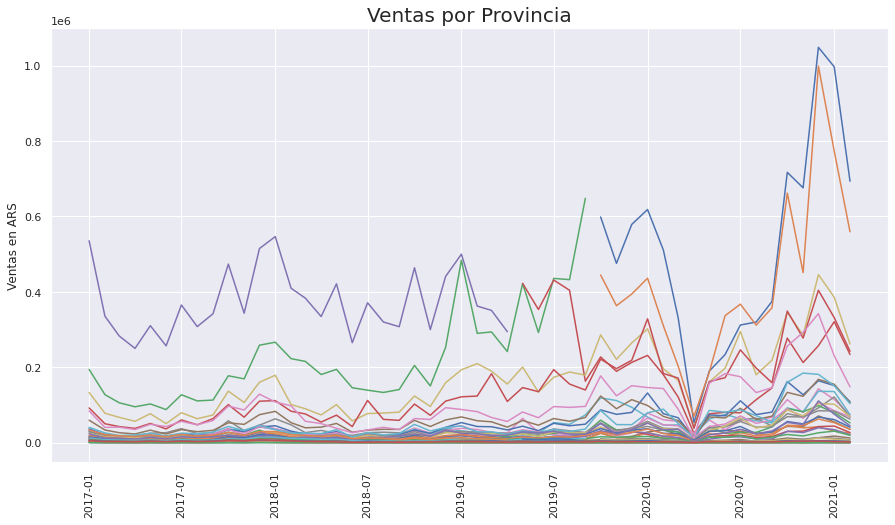

In [48]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(pro)
plt.xticks(rotation=90)
plt.ylabel('Ventas en ARS')
plt.title('Ventas por Provincia', fontdict = {'fontsize' : 20})
plt.show()

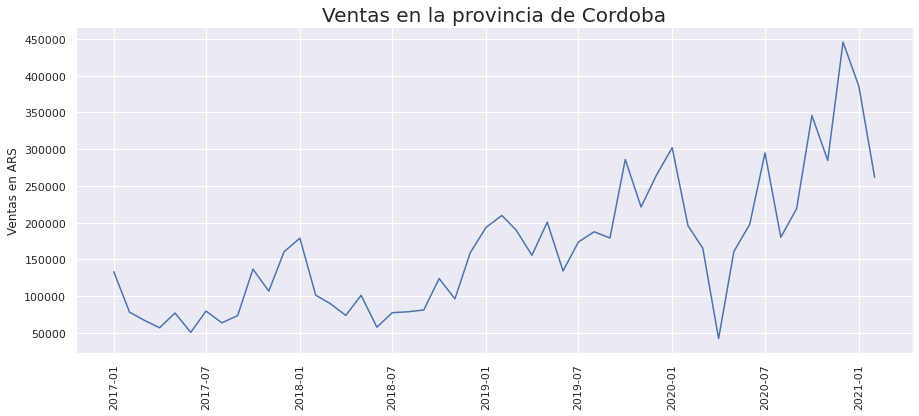

In [49]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(prov.loc['CORDOBA'])
plt.xticks(rotation=90)
plt.ylabel('Ventas en ARS')
plt.title('Ventas en la provincia de Cordoba', fontdict = {'fontsize' : 20})
plt.show()

In [50]:
df['PROVINCE'].unique()

array(['BUENOS AIRES', 'CAP. FED. Y GBA', 'CATAMARCA', 'CHACO', 'CHUBUT',
       'CORDOBA', 'ENTRE RIOS', 'LA PAMPA', 'LA RIOJA', 'MENDOZA',
       'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SAN JUAN', 'SAN LUIS',
       'SANTA CRUZ', 'SANTA FE', 'SANTIAGO DEL ES', 'CORRIENTES',
       'FORMOSA', 'JUJUY', 'SALTA', 'TUCUMAN', 'TIERRA DEL FUEG',
       'CABA ARGENTINA', 'BS.AS. GBA', 'BS.AS. INTERIOR'], dtype=object)

In [51]:
lista = ['BUENOS AIRES', 'CAP. FED. Y GBA', 'CATAMARCA', 'CHACO', 'CHUBUT',
       'CORDOBA', 'ENTRE RIOS']

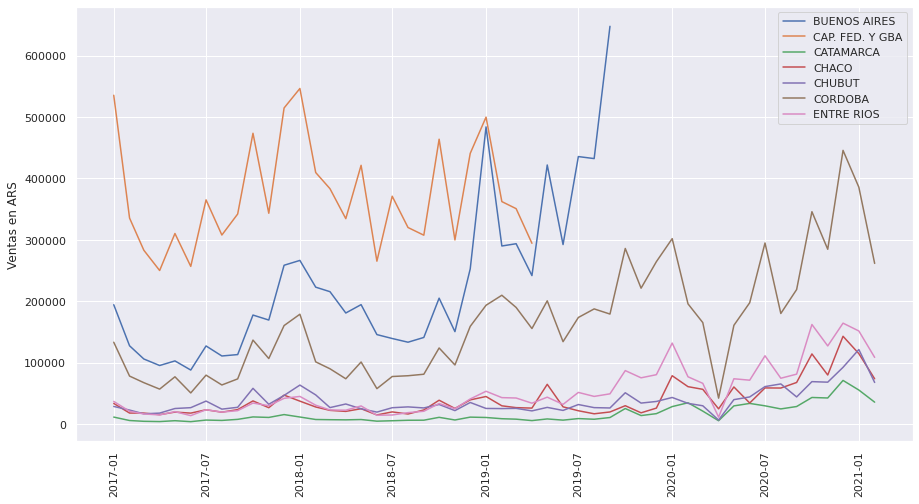

In [52]:
# Plot de serie temporal según una lista de provincias
fig, ax = plt.subplots(figsize=(15, 8))
for l in lista:
  plt.plot(prov.loc[f'{l}'])
plt.xticks(rotation=90)
plt.ylabel('Ventas en ARS')
plt.legend(lista)
plt.show()

Ventas totales

En dólares

In [53]:
p_1 = pd.DataFrame(provincias.groupby(['Fecha']).agg
                          ({'Sales USD': 'sum'})).reset_index()
p_1.columns = ['Fecha', 'Sales USD']
p_1.head()

,Fecha,Sales USD
0,2017-01-01,95249.353293
1,2017-02-01,57983.044621
2,2017-03-01,50595.458693
3,2017-04-01,44658.396556
4,2017-05-01,56657.135546


In [54]:
fig = px.line(p_1, x='Fecha', y="Sales USD", height=500, title='Ventas en USD')
fig.show()

## Ventas por fecha

In [139]:
units = pd.DataFrame(df.groupby(['PROVINCE', 'Year', 'Month']).agg
                          ({'Sales Units': 'sum'}).reset_index())
units.columns = ["".join(a) for a in units.columns.to_flat_index()]
units.head()

,PROVINCE,Year,Month,Sales Units
0,BS.AS. GBA,2019,December,16907.883587
1,BS.AS. GBA,2019,November,13868.237700
2,BS.AS. GBA,2019,October,17073.252700
3,BS.AS. GBA,2020,April,1418.415000
4,BS.AS. GBA,2020,August,6781.500000


In [140]:
units['Fecha'] = units['Month']+' ' + (units['Year'].astype(str))
units['Fecha'] = pd.to_datetime(units['Fecha'])
units = units.drop(columns=['Year', 'Month'])
units = units[[ 'Fecha', 'PROVINCE', 'Sales Units']]
units.head()

,Fecha,PROVINCE,Sales Units
0,2019-12-01,BS.AS. GBA,16907.883587
1,2019-11-01,BS.AS. GBA,13868.237700
2,2019-10-01,BS.AS. GBA,17073.252700
3,2020-04-01,BS.AS. GBA,1418.415000
4,2020-08-01,BS.AS. GBA,6781.500000


In [187]:
un = pd.DataFrame(units.groupby(['Fecha']).agg
                          ({'Sales Units': 'sum'})).reset_index()
un.columns = ['Fecha', 'Sales Units']
un.head()

,Fecha,Sales Units
0,2017-01-01,129128.309143
1,2017-02-01,81913.637671
2,2017-03-01,69323.795357
3,2017-04-01,59471.649986
4,2017-05-01,74733.183166


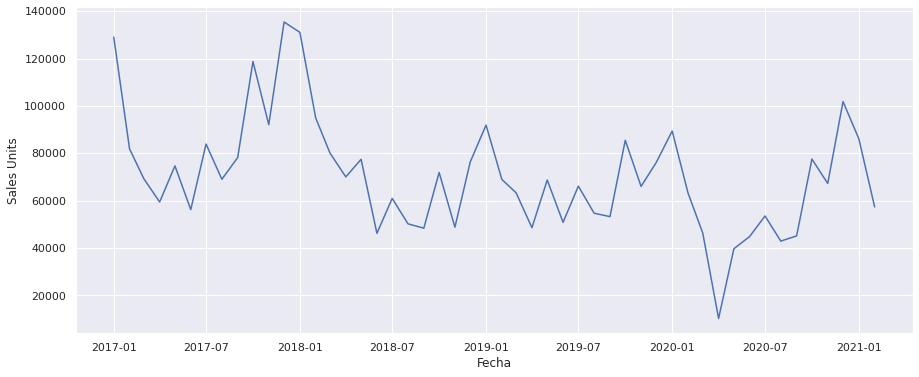

In [188]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Fecha', y='Sales Units', data=un)
plt.show()

In [189]:
fig = px.line(un, x='Fecha', y="Sales Units", height=500, title='Unidades vendidas')
fig.show()

In [190]:
un['year'] = un['Fecha'].dt.year

In [191]:
un.head()

,Fecha,Sales Units,year
0,2017-01-01,129128.309143,2017
1,2017-02-01,81913.637671,2017
2,2017-03-01,69323.795357,2017
3,2017-04-01,59471.649986,2017
4,2017-05-01,74733.183166,2017


In [192]:
anio = un[['Sales Units', 'year']].groupby('year').sum().reset_index()
anio.head()

,year,Sales Units
0,2017,1.048599e+06
1,2018,8.569647e+05
2,2019,7.947382e+05
3,2020,6.825516e+05
4,2021,1.435738e+05


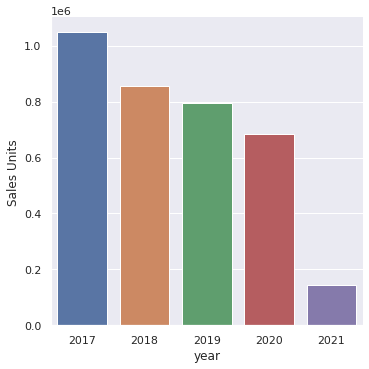

In [193]:
sns.catplot(x='year', y='Sales Units', data=anio, kind='bar')

#### Regresión lineal simple

In [194]:
from sklearn.linear_model import LinearRegression

In [195]:
un.head()

,Fecha,Sales Units,year
0,2017-01-01,129128.309143,2017
1,2017-02-01,81913.637671,2017
2,2017-03-01,69323.795357,2017
3,2017-04-01,59471.649986,2017
4,2017-05-01,74733.183166,2017


In [197]:
un = un.drop(['year'], axis=1)
un['Tiempo'] = np.arange(1, 51, 1)
un['mes'] = un['Fecha'].dt.month_name()
un.head()

,Fecha,Sales Units
0,2017-01-01,129128.309143
1,2017-02-01,81913.637671
2,2017-03-01,69323.795357
3,2017-04-01,59471.649986
4,2017-05-01,74733.183166


In [ ]:
#un.tail()

In [202]:
# Split train-test
train_size = int(un.shape[0]*0.75)
train_size


37

In [ ]:
#un.head(37)

In [205]:
# Separamos en train y test
df_train, df_test = un[:train_size], un[train_size:] 
df_train.shape, df_test.shape

((37, 4), (13, 4))

In [206]:
# Separar por variables
# Train
x_train = df_train[['Tiempo']].values # Los dos corchetes es para que mantenga la forma que necesitamos
y_train = df_train['Sales Units']

x_train.shape, y_train.shape
# Test
x_test = df_test[['Tiempo']].values 
y_test = df_test['Sales Units']

x_test.shape, y_test.shape

((37, 1), (37,))

In [240]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [241]:
y_pred = lr.predict(x_train)

In [242]:
y_futuro_pred = lr.predict(x_test)

In [251]:
# Intervalo de confianza (para un 95% de confianza, z = 1.96)
# media +- margen de error
error = y_train - y_pred
lr_desv_est = error.std()
ME = 1.96 * lr_desv_est # MArgen de error
ME

42664.01830605978

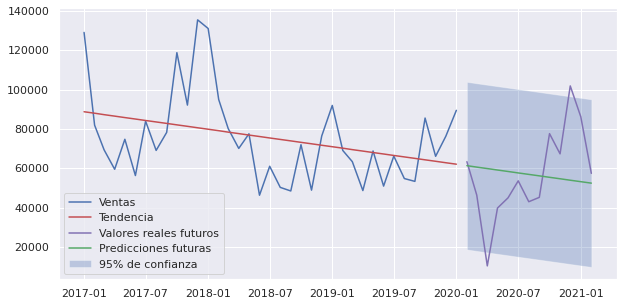

In [252]:
plt.figure(figsize=(10,5))
plt.plot(df_train['Fecha'], y_train)
plt.plot(df_train['Fecha'], y_pred, 'r')
#predicciones
plt.plot(df_test['Fecha'], y_test, 'm')
plt.plot(df_test['Fecha'], y_futuro_pred, 'g')
# Margen de error
ci_mas = y_futuro_pred + ME
ci_menos = y_futuro_pred - ME
plt.fill_between(df_test['Fecha'], (ci_mas), (ci_menos), alpha=.3)

plt.legend(['Ventas', 'Tendencia', 'Valores reales futuros', 'Predicciones futuras', '95% de confianza'])
plt.show()

In [253]:
df_test

,Fecha,Sales Units,Tiempo,mes
37,2020-02-01,63323.26500,38,February
38,2020-03-01,46304.50020,39,March
39,2020-04-01,10282.42500,40,April
40,2020-05-01,39734.99625,41,May
41,2020-06-01,44924.29710,42,June
42,2020-07-01,53577.60000,43,July
43,2020-08-01,42949.05750,44,August
44,2020-09-01,45169.47000,45,September
45,2020-10-01,77608.86750,46,October
46,2020-11-01,67312.18500,47,November


In [254]:
# Predicciones 2020-10-01 77608.86750 	46 	
pred_media = lr.predict(np.array([[46]]))
print('Predicción estimada: ',pred_media)
print('Rango de valores posibles: ',pred_media - ME, pred_media + ME)

Predicción estimada:  [55377.19840188]
Rango de valores posibles:  [12713.18009582] [98041.21670794]


#### Modelo Aditivo

In [257]:
df_train.head()

,Fecha,Sales Units,Tiempo,mes
0,2017-01-01,129128.309143,1,January
1,2017-02-01,81913.637671,2,February
2,2017-03-01,69323.795357,3,March
3,2017-04-01,59471.649986,4,April
4,2017-05-01,74733.183166,5,May


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



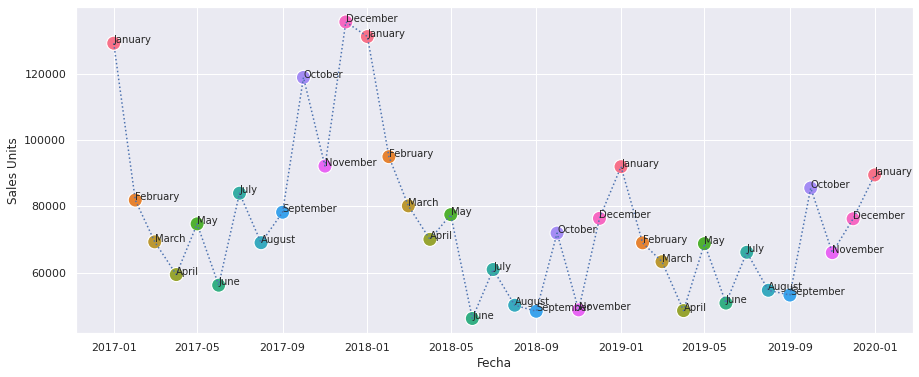

In [294]:
plt.figure(figsize=(15, 6))
plt.plot(df_train['Fecha'], df_train['Sales Units'], 'b:')
sns.scatterplot('Fecha', 'Sales Units', data=df_train, s=200,hue='mes', legend=None)
for i in range(len(df_train)):
  plt.text(df_train['Fecha'][i], df_train['Sales Units'][i], df_train['mes'][i])

plt.show()

In [276]:
# Dummy variables. n=12 (cantidad de meses), necesito n-1 Dummy Variables
dummy = pd.get_dummies(df_train['mes'], drop_first=True)
df_train1 = df_train.copy()
df_train1 = pd.concat((df_train1, dummy), axis=1)
df_train1.head()

,Fecha,Sales Units,Tiempo,mes,August,December,February,January,July,June,March,May,November,October,September
0,2017-01-01,129128.309143,1,January,0,0,0,1,0,0,0,0,0,0,0
1,2017-02-01,81913.637671,2,February,0,0,1,0,0,0,0,0,0,0,0
2,2017-03-01,69323.795357,3,March,0,0,0,0,0,0,1,0,0,0,0
3,2017-04-01,59471.649986,4,April,0,0,0,0,0,0,0,0,0,0,0
4,2017-05-01,74733.183166,5,May,0,0,0,0,0,0,0,1,0,0,0


In [277]:
dummy = pd.get_dummies(df_test['mes'])
df_test1 = df_test.copy()
df_test1 = pd.concat((df_test1, dummy), axis=1)
df_test1.head()

,Fecha,Sales Units,Tiempo,mes,April,August,December,February,January,July,June,March,May,November,October,September
37,2020-02-01,63323.26500,38,February,0,0,0,1,0,0,0,0,0,0,0,0
38,2020-03-01,46304.50020,39,March,0,0,0,0,0,0,0,1,0,0,0,0
39,2020-04-01,10282.42500,40,April,1,0,0,0,0,0,0,0,0,0,0,0
40,2020-05-01,39734.99625,41,May,0,0,0,0,0,0,0,0,1,0,0,0
41,2020-06-01,44924.29710,42,June,0,0,0,0,0,0,1,0,0,0,0,0


In [280]:
#Dividir en X e Y
cols = ['Tiempo', 'August', 	'December', 	'February', 	'January', 	
        'July', 	'June',	'March', 	'May', 	'November', 	'October', 	'September']

In [281]:
x_train_add, x_test_add, y_train_add, y_test_add = df_train1[cols].values, df_test1[cols].values, df_train1['Sales Units'].values, df_test1['Sales Units'].values

print(x_train_add.shape, x_test_add.shape, y_train_add.shape, y_test_add.shape)

(37, 12) (13, 12) (37,) (13,)


In [282]:
lr_add = LinearRegression()
lr_add.fit(x_train_add, y_train_add)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [283]:
# Fiteo
y_pred_add = lr_add.predict(x_train_add)
#Predigo
y_futuro_add = lr_add.predict(x_test_add)

In [289]:
#Calculo el error, el desvíío, y el margen de error
error_add = y_train_add - y_pred_add
desv_est = error.std()
ME = 1.96 * desv_est 
#print('Error: ', error_add)
print('Desvío estándar: ', desv_est)
print('Margen de Error: ', ME)

Desvío estándar:  21767.35627860193
Margen de Error:  42664.01830605978


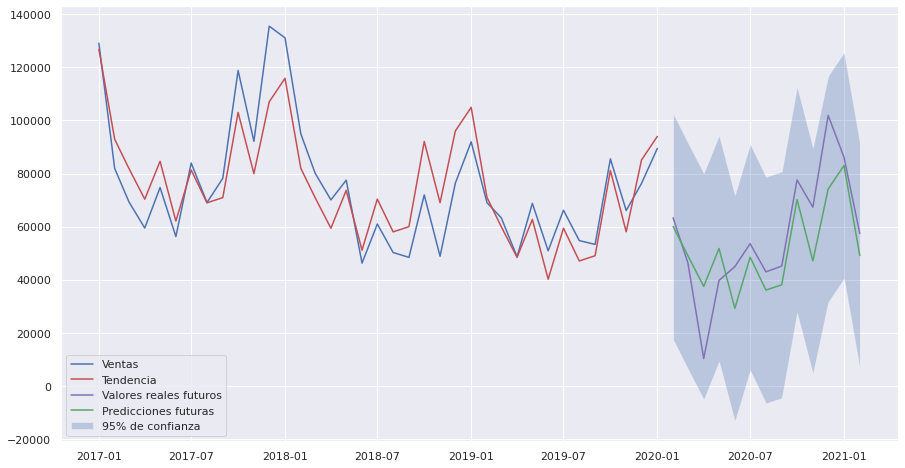

In [292]:
plt.figure(figsize=(15,8))
plt.plot(df_train1['Fecha'], y_train_add)
plt.plot(df_train1['Fecha'], y_pred_add, 'r')
#predicciones
plt.plot(df_test1['Fecha'], y_test_add, 'm')
plt.plot(df_test1['Fecha'], y_futuro_add, 'g')
# Margen de error
ci_mas = y_futuro_add + ME
ci_menos = y_futuro_add - ME
plt.fill_between(df_test1['Fecha'], (ci_mas), (ci_menos), alpha=.3)

plt.legend(['Ventas', 'Tendencia', 'Valores reales futuros', 'Predicciones futuras', '95% de confianza'], 
           loc='lower left')
plt.show()

#### Modelo Multiplicativo

In [295]:
df_train.head()

,Fecha,Sales Units,Tiempo,mes
0,2017-01-01,129128.309143,1,January
1,2017-02-01,81913.637671,2,February
2,2017-03-01,69323.795357,3,March
3,2017-04-01,59471.649986,4,April
4,2017-05-01,74733.183166,5,May
